Loan word classification experiments

GPU compatible

In [258]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd 
import numpy as np 
import os
import io
import requests
import csv
import json
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import pprint
import matplotlib.pyplot as plt
import random

In [259]:
import torch
from torch import nn
from torch import optim
from sklearn.model_selection import train_test_split

In [260]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
# device = 'cpu'
# print(device)

Using cpu device


In [755]:
pairs = None

with open('language-pairs-cognates.json', 'r') as f:
    pairs = json.loads(f.read())
    print(pairs)
    
train_alldata = {}
test_alldata = {}

train_realdist = {}
test_realdist = {}

train_balanced = {}
test_balanced = {}

for pair in pairs:
    print(pair)
    L1 = pairs[pair]['target']['name']
    L2 = pairs[pair]['source']['name']

    # load datasets
    prefix = f'production_train_test/{L1}-{L2}'

    train_alldata[f'{L1}-{L2}'] = pd.read_csv(f'{prefix}/alldata/{L1}-{L2}-train_production_alldata.csv')
    test_alldata[f'{L1}-{L2}'] = pd.read_csv(f'{prefix}/alldata/{L1}-{L2}-test_production_alldata.csv')

    train_realdist[f'{L1}-{L2}'] = pd.read_csv(f'{prefix}/realdist/{L1}-{L2}-train_production_realdist.csv')
    test_realdist[f'{L1}-{L2}'] = pd.read_csv(f'{prefix}/realdist/{L1}-{L2}-test_production_realdist.csv')

    train_balanced[f'{L1}-{L2}'] = pd.read_csv(f'{prefix}/balanced/{L1}-{L2}-train_production_balanced.csv')
    test_balanced[f'{L1}-{L2}'] = pd.read_csv(f'{prefix}/balanced/{L1}-{L2}-test_production_balanced.csv')
    

# uncomment one of these groups
# features = ['Fast Levenshtein Distance Div Maxlen',
#             'Dolgo Prime Distance Div Maxlen',
#             'Feature Edit Distance Div Maxlen',
#             'Hamming Feature Distance Div Maxlen',
#             'Weighted Feature Distance Div Maxlen',
#             'Partial Hamming Feature Distance Div Maxlen',
#             'plain Levenshtein',
#             'DNN_logits']
# results_dir = 'editdists-dnnlogits'

# features = ['Fast Levenshtein Distance Div Maxlen',
#             'Dolgo Prime Distance Div Maxlen',
#             'Feature Edit Distance Div Maxlen',
#             'Hamming Feature Distance Div Maxlen',
#             'Weighted Feature Distance Div Maxlen',
#             'Partial Hamming Feature Distance Div Maxlen',
#             'plain Levenshtein',
#             'mbert_cos',
#             'xlm_cos',
#             'indic_bert_cos',
#             'muril_cos']
# results_dir = 'editdists-mlms'

# features = ['Fast Levenshtein Distance Div Maxlen',
#             'Dolgo Prime Distance Div Maxlen',
#             'Feature Edit Distance Div Maxlen',
#             'Hamming Feature Distance Div Maxlen',
#             'Weighted Feature Distance Div Maxlen',
#             'Partial Hamming Feature Distance Div Maxlen',
#             'plain Levenshtein',
#             'DNN_logits',
#             'mbert_cos',
#             'xlm_cos',
#             'indic_bert_cos',
#             'muril_cos']
# results_dir = 'editdists-dnn-logits-mlms'

# features = ['Fast Levenshtein Distance Div Maxlen',
#             'Dolgo Prime Distance Div Maxlen',
#             'Feature Edit Distance Div Maxlen',
#             'Hamming Feature Distance Div Maxlen',
#             'Weighted Feature Distance Div Maxlen',
#             'Partial Hamming Feature Distance Div Maxlen',
#             'plain Levenshtein',
#             'ass_bertmbert',
#             'ass_bertxlm',
#             'ass_bertindic_bert',
#             'ass_bertmuril']
# results_dir = 'editdists-mapping'

# features = ['Fast Levenshtein Distance Div Maxlen',
#             'Dolgo Prime Distance Div Maxlen',
#             'Feature Edit Distance Div Maxlen',
#             'Hamming Feature Distance Div Maxlen',
#             'Weighted Feature Distance Div Maxlen',
#             'Partial Hamming Feature Distance Div Maxlen',
#             'plain Levenshtein',
#             'DNN_logits',
#             'ass_bertmbert',
#             'ass_bertxlm',
#             'ass_bertindic_bert',
#             'ass_bertmuril']
# results_dir = 'editdists-dnnlogits-mapping'

# features = ['Fast Levenshtein Distance Div Maxlen',
#             'Dolgo Prime Distance Div Maxlen',
#             'Feature Edit Distance Div Maxlen',
#             'Hamming Feature Distance Div Maxlen',
#             'Weighted Feature Distance Div Maxlen',
#             'Partial Hamming Feature Distance Div Maxlen',
#             'plain Levenshtein',
#             'mbert_cos']
# results_dir = 'editdists-mbert'

# features = ['Fast Levenshtein Distance Div Maxlen',
#             'Dolgo Prime Distance Div Maxlen',
#             'Feature Edit Distance Div Maxlen',
#             'Hamming Feature Distance Div Maxlen',
#             'Weighted Feature Distance Div Maxlen',
#             'Partial Hamming Feature Distance Div Maxlen',
#             'plain Levenshtein',
#             'ass_bertmbert']
# results_dir = 'editdists-mbert-mapping'

# features = ['Fast Levenshtein Distance Div Maxlen',
#             'Dolgo Prime Distance Div Maxlen',
#             'Feature Edit Distance Div Maxlen',
#             'Hamming Feature Distance Div Maxlen',
#             'Weighted Feature Distance Div Maxlen',
#             'Partial Hamming Feature Distance Div Maxlen',
#             'plain Levenshtein',
#             'xlm_cos']
# results_dir = 'editdists-xlm'

# features = ['Fast Levenshtein Distance Div Maxlen',
#             'Dolgo Prime Distance Div Maxlen',
#             'Feature Edit Distance Div Maxlen',
#             'Hamming Feature Distance Div Maxlen',
#             'Weighted Feature Distance Div Maxlen',
#             'Partial Hamming Feature Distance Div Maxlen',
#             'plain Levenshtein',
#             'ass_bertxlm']
# results_dir = 'editdists-xlm-mapping'

# features = ['Fast Levenshtein Distance Div Maxlen',
#             'Dolgo Prime Distance Div Maxlen',
#             'Feature Edit Distance Div Maxlen',
#             'Hamming Feature Distance Div Maxlen',
#             'Weighted Feature Distance Div Maxlen',
#             'Partial Hamming Feature Distance Div Maxlen',
#             'plain Levenshtein']
# results_dir = 'editdists'

# features = ['Fast Levenshtein Distance Div Maxlen',
#             'Dolgo Prime Distance Div Maxlen',
#             'Feature Edit Distance Div Maxlen',
#             'Hamming Feature Distance Div Maxlen',
#             'Weighted Feature Distance Div Maxlen',
#             'Partial Hamming Feature Distance Div Maxlen']
# results_dir = 'phonetic-editdists'

# features = ['Fast Levenshtein Distance Div Maxlen',
#             'Dolgo Prime Distance Div Maxlen',
#             'Feature Edit Distance Div Maxlen',
#             'Hamming Feature Distance Div Maxlen',
#             'Weighted Feature Distance Div Maxlen',
#             'Partial Hamming Feature Distance Div Maxlen',
#             'plain Levenshtein',
#             'mbert_cos',
#             'xlm_cos',
#             'indic_bert_cos',
#             'muril_cos',
#             'ass_bertmbert',
#             'ass_bertxlm',
#             'ass_bertindic_bert',
#             'ass_bertmuril']
# results_dir = 'editdists-allmlms-allmappings'

# features = ['Fast Levenshtein Distance Div Maxlen',
#             'Dolgo Prime Distance Div Maxlen',
#             'Feature Edit Distance Div Maxlen',
#             'Hamming Feature Distance Div Maxlen',
#             'Weighted Feature Distance Div Maxlen',
#             'Partial Hamming Feature Distance Div Maxlen',
#             'plain Levenshtein',
#             'DNN_logits',
#             'mbert_cos',
#             'xlm_cos',
#             'indic_bert_cos',
#             'muril_cos',
#             'ass_bertmbert',
#             'ass_bertxlm',
#             'ass_bertindic_bert',
#             'ass_bertmuril']
# results_dir = 'editdists-dnnlogits-allmlms-allmappings'

# features = ['Fast Levenshtein Distance Div Maxlen',
#             'Dolgo Prime Distance Div Maxlen',
#             'Feature Edit Distance Div Maxlen',
#             'Hamming Feature Distance Div Maxlen',
#             'Weighted Feature Distance Div Maxlen',
#             'Partial Hamming Feature Distance Div Maxlen',
#             'mbert_cos',
#             'xlm_cos',
#             'indic_bert_cos',
#             'muril_cos',
#             'ass_bertmbert',
#             'ass_bertxlm',
#             'ass_bertindic_bert',
#             'ass_bertmuril']
# results_dir = 'phonetic-editdists-allmlms-allmappings'

# features = ['Fast Levenshtein Distance Div Maxlen',
#             'Dolgo Prime Distance Div Maxlen',
#             'Feature Edit Distance Div Maxlen',
#             'Hamming Feature Distance Div Maxlen',
#             'Weighted Feature Distance Div Maxlen',
#             'Partial Hamming Feature Distance Div Maxlen',
#             'DNN_logits',
#             'mbert_cos',
#             'xlm_cos',
#             'indic_bert_cos',
#             'muril_cos',
#             'ass_bertmbert',
#             'ass_bertxlm',
#             'ass_bertindic_bert',
#             'ass_bertmuril']
# results_dir = 'phonetic-editdists-dnnlogits-allmlms-allmappings'

# features = ['Fast Levenshtein Distance Div Maxlen',
#             'Dolgo Prime Distance Div Maxlen',
#             'Feature Edit Distance Div Maxlen',
#             'Hamming Feature Distance Div Maxlen',
#             'Weighted Feature Distance Div Maxlen',
#             'Partial Hamming Feature Distance Div Maxlen',
#             'mbert_cos',
#             'xlm_cos',
#             'indic_bert_cos',
#             'muril_cos']
# results_dir = 'phonetic-editdists-mlms'

# features = ['Fast Levenshtein Distance Div Maxlen',
#             'Dolgo Prime Distance Div Maxlen',
#             'Feature Edit Distance Div Maxlen',
#             'Hamming Feature Distance Div Maxlen',
#             'Weighted Feature Distance Div Maxlen',
#             'Partial Hamming Feature Distance Div Maxlen',
#             'DNN_logits',
#             'mbert_cos',
#             'xlm_cos',
#             'indic_bert_cos',
#             'muril_cos']
# results_dir = 'phonetic-editdists-dnnlogits-mlms'

# features = ['Fast Levenshtein Distance Div Maxlen',
#             'Dolgo Prime Distance Div Maxlen',
#             'Feature Edit Distance Div Maxlen',
#             'Hamming Feature Distance Div Maxlen',
#             'Weighted Feature Distance Div Maxlen',
#             'Partial Hamming Feature Distance Div Maxlen',
#             'ass_bertmbert',
#             'ass_bertxlm',
#             'ass_bertindic_bert',
#             'ass_bertmuril']
# results_dir = 'phonetic-editdists-mapping'

# features = ['Fast Levenshtein Distance Div Maxlen',
#             'Dolgo Prime Distance Div Maxlen',
#             'Feature Edit Distance Div Maxlen',
#             'Hamming Feature Distance Div Maxlen',
#             'Weighted Feature Distance Div Maxlen',
#             'Partial Hamming Feature Distance Div Maxlen',
#             'DNN_logits',
#             'ass_bertmbert',
#             'ass_bertxlm',
#             'ass_bertindic_bert',
#             'ass_bertmuril']
# results_dir = 'phonetic-editdists-dnnlogits-mapping'

# features = ['Fast Levenshtein Distance Div Maxlen',
#             'Dolgo Prime Distance Div Maxlen',
#             'Feature Edit Distance Div Maxlen',
#             'Hamming Feature Distance Div Maxlen',
#             'Weighted Feature Distance Div Maxlen',
#             'Partial Hamming Feature Distance Div Maxlen',
#             'mbert_src_assbert_trg']
# results_dir = 'phonetic-editdists-sentmapping'

# features = ['Fast Levenshtein Distance Div Maxlen',
#             'Dolgo Prime Distance Div Maxlen',
#             'Feature Edit Distance Div Maxlen',
#             'Hamming Feature Distance Div Maxlen',
#             'Weighted Feature Distance Div Maxlen',
#             'Partial Hamming Feature Distance Div Maxlen',
#             'DNN_logits',
#             'mbert_src_assbert_trg']
# results_dir = 'phonetic-editdists-dnnlogits-sentmapping'

# features = ['Fast Levenshtein Distance Div Maxlen',
#             'Dolgo Prime Distance Div Maxlen',
#             'Feature Edit Distance Div Maxlen',
#             'Hamming Feature Distance Div Maxlen',
#             'Weighted Feature Distance Div Maxlen',
#             'Partial Hamming Feature Distance Div Maxlen',
#             'mbert_cos',
#             'xlm_cos',
#             'indic_bert_cos',
#             'muril_cos',
#             'mbert_src_assbert_trg']
# results_dir = 'phonetic-editdists-mlms-sentmapping'

# features = ['Fast Levenshtein Distance Div Maxlen',
#             'Dolgo Prime Distance Div Maxlen',
#             'Feature Edit Distance Div Maxlen',
#             'Hamming Feature Distance Div Maxlen',
#             'Weighted Feature Distance Div Maxlen',
#             'Partial Hamming Feature Distance Div Maxlen',
#             'DNN_logits',
#             'mbert_cos',
#             'xlm_cos',
#             'indic_bert_cos',
#             'muril_cos',
#             'mbert_src_assbert_trg']
# results_dir = 'phonetic-editdists-dnnlogits-mlms-sentmapping'

# features = ['Fast Levenshtein Distance Div Maxlen',
#             'Dolgo Prime Distance Div Maxlen',
#             'Feature Edit Distance Div Maxlen',
#             'Hamming Feature Distance Div Maxlen',
#             'Weighted Feature Distance Div Maxlen',
#             'Partial Hamming Feature Distance Div Maxlen',
#             'ass_bertmbert',
#             'ass_bertxlm',
#             'ass_bertindic_bert',
#             'ass_bertmuril',
#             'mbert_src_assbert_trg']
# results_dir = 'phonetic-editdists-mapping-sentmapping'

features = ['Fast Levenshtein Distance Div Maxlen',
            'Dolgo Prime Distance Div Maxlen',
            'Feature Edit Distance Div Maxlen',
            'Hamming Feature Distance Div Maxlen',
            'Weighted Feature Distance Div Maxlen',
            'Partial Hamming Feature Distance Div Maxlen',
            'DNN_logits',
            'ass_bertmbert',
            'ass_bertxlm',
            'ass_bertindic_bert',
            'ass_bertmuril',
            'mbert_src_assbert_trg']
results_dir = 'phonetic-editdists-dnnlogits-mapping-sentmapping'

labels = ['label_bin']

{'Assamese-Bengali': {'target': {'name': 'Assamese', 'epi': 'asm-Beng', 'gtrans': 'as', 'unicode': 'Bengali'}, 'source': {'name': 'Bengali', 'epi': 'ben-Beng', 'gtrans': 'bn', 'unicode': 'Bengali'}, 'wiki': 'https://en.m.wiktionary.org/wiki/Category:Assamese_terms_derived_from_Sanskrit', 'loan-frac': '.5'}, 'Bengali-Assamese': {'target': {'name': 'Bengali', 'epi': 'ben-Beng', 'gtrans': 'bn', 'unicode': 'Bengali'}, 'source': {'name': 'Assamese', 'epi': 'asm-Beng', 'gtrans': 'as', 'unicode': 'Bengali'}, 'wiki': 'https://en.m.wiktionary.org/wiki/Category:Bengali_terms_derived_from_Sanskrit', 'loan-frac': '.5'}}
Assamese-Bengali
Bengali-Assamese


In [756]:
print(features)

['Fast Levenshtein Distance Div Maxlen', 'Dolgo Prime Distance Div Maxlen', 'Feature Edit Distance Div Maxlen', 'Hamming Feature Distance Div Maxlen', 'Weighted Feature Distance Div Maxlen', 'Partial Hamming Feature Distance Div Maxlen', 'DNN_logits', 'ass_bertmbert', 'ass_bertxlm', 'ass_bertindic_bert', 'ass_bertmuril', 'mbert_src_assbert_trg']


In [757]:
def classification_report_csv(report, language_pair, all_lang=False, train_evaluate_pair =True):
    #if language_pair ==True:
        
        #language_pair = pair

    report_data = []
    lines = report.split('\n')
    #print("lines",len(lines))
    #print(lines)
    for i, line in enumerate(lines[2:-3]):

        if i ==0 or i==1:
            #print("i", i)


           #print("actual lines",line)
            row = {}
            #row_data = line.split('      ')
            row_data = line.split(' ') 
            row_data = list(filter(None, row_data))
            #print(row_data)
            #print("rowdata",row_data[4] )
        row['all_language_evaluate'] = all_lang
        row['train_evaluate_pair'] = train_evaluate_pair
        row['language_pair'] = language_pair
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])

        if i==3:
            #print("actual lines", line)
            #print("i", i)
            row_data = line.split(' ') 
            row_data = list(filter(None, row_data))
            row['acc'] = float(row_data[1])

        report_data.append(row)
    print("final report", report_data[0:2])
    dataframe = pd.DataFrame.from_dict(report_data[0:2])
    return dataframe
    #dataframe.to_csv((f'{pair}-class_report.csv'), index=False)
    #class_report.to_csv((f'{pair}-class_report.csv'), index=False)

 

# Logistic Regression classifier

In [758]:
def lr_evaluate(full_train_set, full_test_set, pairs_list):
    all_result = []
    all_lang_fp_list= []
    all_lang_fn_list=[]
    evaluate_lang_fp_list = []
    evaluate_lang_fn_list = []
    train_evaluate_lang_fp_list = []
    train_evaluate_lang_fn_list = []
    weights_list = []
    
    pair ='All languages' #pair None for all languages evaluation
    
    
    
    
    display_fields = ['loan_word',
              'original_word',
              'loan_word_epitran',
              'original_word_epitran',
              'loan_english',
              'original_english'] + features
        
    train_set = pd.concat([full_train_set[pair][display_fields + ["label"] + labels] for pair in pairs])
    x_train = train_set[features].values
    x_means = np.mean(x_train, axis=0)
    x_stds = np.std(x_train, axis=0)
    x_stds[x_stds == 0] = 1
    y_train = train_set[labels].values.ravel()
    
    #print(train_set[features])
    #print(train_set[features][train_set[features].isna()])
    
    test_set = pd.concat([full_test_set[pair][display_fields + ["label"] + labels] for pair in pairs])
    x_test = test_set[features].values
    y_test = test_set[labels].values.ravel()
    
    # standardize input features
    x_train = (x_train - x_means)/x_stds
    #print(np.where(np.isnan(x_train)))
    #print(train_set[features].iloc[:,6])
    
    print("Training on all langs\n")
    LR = LogisticRegression(random_state=1, solver='lbfgs', multi_class='ovr', max_iter=500).fit(x_train, y_train)

    # display regressor weights
    df = pd.DataFrame(LR.coef_, columns=features).style.set_caption('Weights')
    df_weights = pd.DataFrame(LR.coef_, columns=features) 
     
    df_weights.insert(0, 'language_pair', pair)
    
    weights_list.append(df_weights)
     
    display(df)
    print()
    
    print("Evaluating on all langs")
    x_test = (x_test - x_means)/x_stds
    y_pred = LR.predict(x_test)

    print("f1-score : ", f1_score(y_test, y_pred ))
    print("precision : ",precision_score(y_test, y_pred))
    print("recall : ",recall_score(y_test, y_pred )) 
    print("accuracy : ",accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, output_dict=True))
    #class_report = classification_report(y_test, y_pred)
    #a = classification_report_csv(class_report,pair , all_lang=True)
    print(confusion_matrix(y_test, y_pred))
    class_report = classification_report(y_test, y_pred)
    a = classification_report_csv(class_report,pair,all_lang=True, train_evaluate_pair =False)
    all_result.append(a)
    
    #all_result.append(a)
    #class_report = classification_report(y_test, y_pred, output_dict=True)
     
    print()
    
    # display false positives and false negatives
    unq = np.array([x + 2*y for x, y in zip(y_pred, y_test)])
    tp = np.array(np.where(unq == 3)).tolist()[0]
    fp = np.array(np.where(unq == 1)).tolist()[0]
    tn = np.array(np.where(unq == 0)).tolist()[0]
    fn = np.array(np.where(unq == 2)).tolist()[0]

    #display(test_set.reset_index(drop=True).iloc[fp,:][display_fields + ["label"]].style.set_caption('False positives'))
    #display(test_set.reset_index(drop=True).iloc[fn,:][display_fields + ["label"]].style.set_caption('False negatives'))
    all_lang_fp = test_set.reset_index(drop=True).iloc[fp,:][display_fields + ["label"]]
    all_lang_fn = test_set.reset_index(drop=True).iloc[fn,:][display_fields + ["label"]]
    all_lang_fp.insert(0, 'language_pair', pair)
    all_lang_fn.insert(0, 'language_pair', pair)
    all_lang_fp_list.append(all_lang_fp)
    all_lang_fn_list.append(all_lang_fn)
    for pair in pairs_list:
        print(f'Evaluating on {pair}')
        
        test_set = full_test_set[pair][display_fields + ["label"] + labels]
        x_test = test_set[features].values
        y_test = test_set[labels].values.ravel()
        
        x_test = (x_test - x_means)/x_stds
        y_pred = LR.predict(x_test)
        
        print("f1-score : ", f1_score(y_test, y_pred ))
        print("precision : ",precision_score(y_test, y_pred))
        print("recall : ",recall_score(y_test, y_pred )) 
        print("accuracy : ",accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        class_report = classification_report(y_test, y_pred)
        a = classification_report_csv(class_report,pair,all_lang=False, train_evaluate_pair =False)
        all_result.append(a)
        
        #class_report = pd.DataFrame(class_report).transpose()
        #class_report.to_csv('lr_alllang_report.csv', index=False)
        
        print(confusion_matrix(y_test, y_pred))
        print()
        
        # display false positives and false negatives
        unq = np.array([x + 2*y for x, y in zip(y_pred, y_test)])
        tp = np.array(np.where(unq == 3)).tolist()[0]
        fp = np.array(np.where(unq == 1)).tolist()[0]
        tn = np.array(np.where(unq == 0)).tolist()[0]
        fn = np.array(np.where(unq == 2)).tolist()[0]

        #display(test_set.reset_index(drop=True).iloc[fp,:][display_fields + ["label"]].style.set_caption('False positives'))
        #display(test_set.reset_index(drop=True).iloc[fn,:][display_fields + ["label"]].style.set_caption('False negatives'))
        evaluate_lang_fp = test_set.reset_index(drop=True).iloc[fp,:][display_fields + ["label"]]
        evaluate_lang_fn = test_set.reset_index(drop=True).iloc[fn,:][display_fields + ["label"]]
        evaluate_lang_fp.insert(0, 'language_pair', pair)
        evaluate_lang_fn.insert(0, 'language_pair', pair)
        evaluate_lang_fp_list.append(evaluate_lang_fp)
        evaluate_lang_fn_list.append(evaluate_lang_fn)
        
    for pair in pairs_list:
        print(f'Training and evaluating on {pair}')
        
        train_set = full_train_set[pair][display_fields + ["label"] + labels]
        x_train = train_set[features].values
        x_means = np.mean(x_train, axis=0)
        x_stds = np.std(x_train, axis=0)
        x_stds[x_stds == 0] = 1
        y_train = train_set[labels].values.ravel()
        
        test_set = full_test_set[pair][display_fields + ["label"] + labels]
        x_test = test_set[features].values
        y_test = test_set[labels].values.ravel()
        
        x_train = (x_train - x_means)/x_stds
        
        LR = LogisticRegression(random_state=1, solver='lbfgs', multi_class='ovr', max_iter=500).fit(x_train, y_train)
        
        # display regressor weights
        df = pd.DataFrame(LR.coef_, columns=features).style.set_caption('Weights')
        df_weights = pd.DataFrame(LR.coef_, columns=features)
        df_weights.insert(0, 'language_pair', pair)
        weights_list.append(df_weights)
        display(df)

        x_test = (x_test - x_means)/x_stds
        y_pred = LR.predict(x_test)
        
        print("f1-score : ", f1_score(y_test, y_pred ))
        print("precision : ",precision_score(y_test, y_pred))
        print("recall : ",recall_score(y_test, y_pred )) 
        print("accuracy : ",accuracy_score(y_test, y_pred))
        #print(classification_report(y_test, y_pred))
        print(classification_report(y_test, y_pred, output_dict=True))
        #class_report = classification_report(y_test, y_pred, output_dict=True)
        #class_report = pd.DataFrame(class_report).transpose()
        #class_report.to_csv((f'{pair}-class_report.csv'), index=False)
        print(confusion_matrix(y_test, y_pred))
        class_report = classification_report(y_test, y_pred)
        a = classification_report_csv(class_report,pair,all_lang=False,train_evaluate_pair =True)
        all_result.append(a)
        print()
        
        # display false positives and false negatives
        unq = np.array([x + 2*y for x, y in zip(y_pred, y_test)])
        tp = np.array(np.where(unq == 3)).tolist()[0]
        fp = np.array(np.where(unq == 1)).tolist()[0]
        tn = np.array(np.where(unq == 0)).tolist()[0]
        fn = np.array(np.where(unq == 2)).tolist()[0]

        #display(test_set.reset_index(drop=True).iloc[fp,:][display_fields + ["label"]].style.set_caption('False positives'))
        #display(test_set.reset_index(drop=True).iloc[fn,:][display_fields + ["label"]].style.set_caption('False negatives'))
        train_evaluate_lang_fp = test_set.reset_index(drop=True).iloc[fp,:][display_fields + ["label"]]
        train_evaluate_lang_fn = test_set.reset_index(drop=True).iloc[fn,:][display_fields + ["label"]]
        train_evaluate_lang_fp.insert(0, 'language_pair', pair)
        train_evaluate_lang_fn.insert(0, 'language_pair', pair)
        train_evaluate_lang_fp_list.append(train_evaluate_lang_fp)
        train_evaluate_lang_fn_list.append(train_evaluate_lang_fn)
    final_result = pd.concat(all_result, ignore_index=True)
    all_lang_fp_list = pd.concat(all_lang_fp_list, ignore_index=True)
    all_lang_fn_list = pd.concat(all_lang_fn_list, ignore_index=True)
    evaluate_lang_fp_list = pd.concat(evaluate_lang_fp_list, ignore_index=True)
    evaluate_lang_fn_list = pd.concat(evaluate_lang_fn_list, ignore_index=True)
    train_evaluate_lang_fp_list = pd.concat(train_evaluate_lang_fp_list, ignore_index=True)
    train_evaluate_lang_fn_list = pd.concat(train_evaluate_lang_fn_list, ignore_index=True)
    weights = pd.concat(weights_list, ignore_index=True)
    
    return final_result, all_lang_fp_list, all_lang_fn_list, evaluate_lang_fp_list, evaluate_lang_fn_list, train_evaluate_lang_fp_list, train_evaluate_lang_fn_list, weights

# saving final results for all_data

In [759]:
print("Evaluating and Saving final results as csv files on alldata splits\n")
output_alldata,all_lang_fp, all_lang_fn, evaluate_lang_fp, evaluate_lang_fn, train_evaluate_lang_fp, train_evaluate_lang_fn, weights = lr_evaluate(train_alldata, test_alldata, pairs)
#prefix = f'../Final_results/all_data/LR_results'
#prefix = f'../Final_results/all_data/features_wo_dnnlogits_cosims/LR_results'
#prefix = f'../Final_results/all_data/logits_cosim_plainlev/LR_results'
prefix = f'../Final_results/all_data/{results_dir}/LR_results'
if os.path.isdir(prefix):
    print("Exists")
else:
    print("Doesn't exist")
    os.mkdir(prefix)
output_alldata.to_csv(f'{prefix}/final_results.csv')
all_lang_fp.to_csv(f'{prefix}/all_lang_falsepos.csv')
all_lang_fn.to_csv(f'{prefix}/all_lang_falseneg.csv')
evaluate_lang_fp.to_csv(f'{prefix}/all_lang_pair_eval_falsepos.csv')
evaluate_lang_fn.to_csv(f'{prefix}/all_lang_pair_eval_falseneg.csv')
train_evaluate_lang_fp.to_csv(f'{prefix}/indiv_pair_eval_falsepos.csv')
train_evaluate_lang_fn.to_csv(f'{prefix}/indiv_pair_eval_falseneg.csv')
weights.to_csv(f'{prefix}/LR_weights.csv')

# print("Evaluating on realdist splits\n")
# lr_evaluate(train_realdist, test_realdist, pairs)

# print("Evaluating on balanced splits\n")
# lr_evaluate(train_balanced, test_balanced, pairs)

Evaluating and Saving final results as csv files on alldata splits

Training on all langs



,Fast Levenshtein Distance Div Maxlen,Dolgo Prime Distance Div Maxlen,Feature Edit Distance Div Maxlen,Hamming Feature Distance Div Maxlen,Weighted Feature Distance Div Maxlen,Partial Hamming Feature Distance Div Maxlen,DNN_logits,ass_bertmbert,ass_bertxlm,ass_bertindic_bert,ass_bertmuril,mbert_src_assbert_trg
0,-0.791714,0.072922,-0.071976,0.632344,-0.375560,0.195730,3.287115,0.005689,0.612618,-0.112198,-0.116639,0.042200



Evaluating on all langs
f1-score :  0.8651877133105802
precision :  0.8910369068541301
recall :  0.8407960199004975
accuracy :  0.9525667967577304
{'0': {'precision': 0.9652425778421434, 'recall': 0.9772727272727273, 'f1-score': 0.9712204007285974, 'support': 2728}, '1': {'precision': 0.8910369068541301, 'recall': 0.8407960199004975, 'f1-score': 0.8651877133105802, 'support': 603}, 'accuracy': 0.9525667967577304, 'macro avg': {'precision': 0.9281397423481368, 'recall': 0.9090343735866124, 'f1-score': 0.9182040570195888, 'support': 3331}, 'weighted avg': {'precision': 0.9518093687140221, 'recall': 0.9525667967577304, 'f1-score': 0.952025651250043, 'support': 3331}}
[[2666   62]
 [  96  507]]
final report [{'all_language_evaluate': True, 'train_evaluate_pair': False, 'language_pair': 'All languages', 'class': '0', 'precision': 0.97, 'recall': 0.98, 'f1_score': 0.97, 'support': 2728.0}, {'all_language_evaluate': True, 'train_evaluate_pair': False, 'language_pair': 'All languages', 'class

,Fast Levenshtein Distance Div Maxlen,Dolgo Prime Distance Div Maxlen,Feature Edit Distance Div Maxlen,Hamming Feature Distance Div Maxlen,Weighted Feature Distance Div Maxlen,Partial Hamming Feature Distance Div Maxlen,DNN_logits,ass_bertmbert,ass_bertxlm,ass_bertindic_bert,ass_bertmuril,mbert_src_assbert_trg
0,-0.605830,-0.176115,0.018026,0.416748,0.430483,0.082609,3.221175,0.063901,1.084282,-0.081823,0.022674,-0.101524


f1-score :  0.8663282571912013
precision :  0.8888888888888888
recall :  0.8448844884488449
accuracy :  0.9535294117647058
{'0': {'precision': 0.96671388101983, 'recall': 0.9770937723693629, 'f1-score': 0.97187611249555, 'support': 1397}, '1': {'precision': 0.8888888888888888, 'recall': 0.8448844884488449, 'f1-score': 0.8663282571912013, 'support': 303}, 'accuracy': 0.9535294117647058, 'macro avg': {'precision': 0.9278013849543594, 'recall': 0.9109891304091039, 'f1-score': 0.9191021848433756, 'support': 1700}, 'weighted avg': {'precision': 0.9528427206576682, 'recall': 0.9535294117647058, 'f1-score': 0.9530637594618925, 'support': 1700}}
[[1365   32]
 [  47  256]]
final report [{'all_language_evaluate': False, 'train_evaluate_pair': True, 'language_pair': 'Assamese-Bengali', 'class': '0', 'precision': 0.97, 'recall': 0.98, 'f1_score': 0.97, 'support': 1397.0}, {'all_language_evaluate': False, 'train_evaluate_pair': True, 'language_pair': 'Assamese-Bengali', 'class': '1', 'precision': 0

,Fast Levenshtein Distance Div Maxlen,Dolgo Prime Distance Div Maxlen,Feature Edit Distance Div Maxlen,Hamming Feature Distance Div Maxlen,Weighted Feature Distance Div Maxlen,Partial Hamming Feature Distance Div Maxlen,DNN_logits,ass_bertmbert,ass_bertxlm,ass_bertindic_bert,ass_bertmuril,mbert_src_assbert_trg
0,-0.874784,0.138271,0.018902,0.504400,-0.509824,0.190327,3.273575,-0.210234,0.179820,0.122788,0.098809,0.141531


f1-score :  0.8722316865417377
precision :  0.89198606271777
recall :  0.8533333333333334
accuracy :  0.9540159411404047
{'0': {'precision': 0.9672619047619048, 'recall': 0.976709241172051, 'f1-score': 0.9719626168224299, 'support': 1331}, '1': {'precision': 0.89198606271777, 'recall': 0.8533333333333334, 'f1-score': 0.8722316865417377, 'support': 300}, 'accuracy': 0.9540159411404047, 'macro avg': {'precision': 0.9296239837398375, 'recall': 0.9150212872526922, 'f1-score': 0.9220971516820837, 'support': 1631}, 'weighted avg': {'precision': 0.9534159497568524, 'recall': 0.9540159411404047, 'f1-score': 0.9536184849498317, 'support': 1631}}
[[1300   31]
 [  44  256]]
final report [{'all_language_evaluate': False, 'train_evaluate_pair': True, 'language_pair': 'Bengali-Assamese', 'class': '0', 'precision': 0.97, 'recall': 0.98, 'f1_score': 0.97, 'support': 1331.0}, {'all_language_evaluate': False, 'train_evaluate_pair': True, 'language_pair': 'Bengali-Assamese', 'class': '1', 'precision': 0.

# Neural Network classifier

## Definition

In [760]:
class NeuralNetwork(nn.Module):
    def __init__(self, n_features):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(n_features, 512),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(128, 1),
            
        )

    def forward(self, x):
        logits_new = self.linear_relu_stack(x)
        logits  = logits_new
        
        return torch.sigmoid(logits), logits_new
    
    def fit(self, X_train, Y_train, X_val, Y_val, criterion, optimizer, n_epochs=5000):
        train_losses = []
        val_losses = []
        train_accur = []
        val_accur = []

        for epoch in range(n_epochs):
            y_pred, logits = self(X_train.float())

            train_loss = criterion(y_pred, Y_train.float())

            if epoch % (n_epochs // 50) == 0:
                train_acc,_ = self.calculate_accuracy(Y_train, y_pred)

                y_val_pred = self(X_val.float())[0]

                val_loss = criterion(y_val_pred, Y_val.float())

                val_acc, total_corr = self.calculate_accuracy(Y_val, y_val_pred)

                print(f'''epoch {epoch}
                    Train set - loss: {self.round_tensor(train_loss)}, accuracy: {self.round_tensor(train_acc)} 
                    Val set - loss: {self.round_tensor(val_loss)}, accuracy: {self.round_tensor(val_acc)}''')
                
                train_losses.append(train_loss.detach().cpu().numpy())
                val_losses.append(val_loss.detach().cpu().numpy())

                val_accur.append(val_acc.detach().cpu().numpy())
                train_accur.append(train_acc.detach().cpu().numpy())

            optimizer.zero_grad()

            train_loss.backward()

            optimizer.step()
            
        return train_losses,val_losses,train_accur,val_accur
    
    def calculate_accuracy(self, y_true, y_pred):
        predicted = y_pred.ge(.5) 
        return ((y_true == predicted).sum().float() / len(y_true), (y_true == predicted).sum())
    
    def round_tensor(self, t, decimal_places=3):
        return round(t.item(), decimal_places)
    
    def plot_losses(self, train_losses, val_losses, train_accur, val_accur):
        epochs = range(1, len(train_accur) + 1)

        plt.plot(epochs, train_accur, 'bo', label='Training acc')
        plt.plot(epochs, val_accur, 'b', label='Vaidation acc')
        plt.title('Training and validation accuracy')
        plt.legend()

        plt.figure()

        plt.plot(epochs, train_losses, 'bo', label='Training loss')
        plt.plot(epochs, val_losses, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()

        plt.show()

In [761]:
def nn_evaluate(full_train_set, full_test_set, pairs_list):   
    all_result_nn = []
    all_result = []
    all_lang_fp_list= []
    all_lang_fn_list=[]
    evaluate_lang_fp_list = []
    evaluate_lang_fn_list = []
    train_evaluate_lang_fp_list = []
    train_evaluate_lang_fn_list = []
     
    pair =None #pair None for all languages evaluation
    display_fields = ['loan_word',
              'original_word',
              'loan_word_epitran',
              'original_word_epitran',
              'loan_english',
              'original_english'] + features
        
    train_set = pd.concat([full_train_set[pair][display_fields + ["label"] + labels] for pair in pairs])
    x_train = train_set[features].values
    x_means = np.mean(x_train, axis=0)
    x_stds = np.std(x_train, axis=0)
    x_stds[x_stds == 0] = 1
    y_train = train_set[labels].values.ravel()
    
    test_set = pd.concat([full_test_set[pair][display_fields + ["label"] + labels] for pair in pairs])
    x_test = test_set[features].values
    y_test = test_set[labels].values.ravel()
    
    # standardize input features
    x_train = (x_train - x_means)/x_stds
    
    torch.manual_seed(7)
    random.seed(7)
    np.random.seed(7)
    
    model = NeuralNetwork(x_train.shape[1]).to(device)
    print(model)
    
    criterion = nn.BCELoss().to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.00001)
    #optimizer = optim.SGD(model.parameters(),lr=0.00001, momentum=0.0,  weight_decay=0.0, nesterov=False)
    
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1, stratify=y_train)

    x_train = torch.tensor(x_train).to(device)
    x_val = torch.tensor(x_val).to(device)
    y_train = torch.tensor(y_train).reshape(-1,1).to(device)
    y_val = torch.tensor(y_val).reshape(-1,1).to(device)
        
    print("Training on all langs\n")
    train_losses, val_losses, train_accur, val_accur = \
        model.fit(x_train, y_train, x_val, y_val, criterion, optimizer, n_epochs=5000)
    
    #save the trained model and its state dictionary on your required path 
    model_prefix = '../torch_models/DNN_model/'

    #if os.path.isdir(model_prefix ):
    #    print("Exists")
    #else:
    #    print("Doesn't exist")
    #    os.mkdir(model_prefix )
    #model_path = '../torch_models/DNN_model/DNN_model.bin'
    #torch.save(model,model_path )
    #torch.save(model.state_dict(), model_path)
    model.plot_losses(train_losses,val_losses,train_accur,val_accur)
     
    model.eval()
    
    x_test = (x_test - x_means)/x_stds
    x_test = torch.tensor(x_test).to(device)

    with torch.no_grad():
        y_pred = model(torch.tensor(x_test).float())[0] > .5
        y_pred = y_pred.detach().cpu().numpy()

        print("f1-score : ", f1_score(y_test, y_pred))
        print("precision : ",precision_score(y_test, y_pred))
        print("recall : ",recall_score(y_test, y_pred)) 
        print("accuracy : ",accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))
        class_report = classification_report(y_test, y_pred)
        a = classification_report_csv(class_report,pair,all_lang=True, train_evaluate_pair =False)
        all_result_nn.append(a)
        print()
        
        # display false positives and false negatives
        unq = np.array([x + 2*y for x, y in zip(y_pred, y_test)])
        tp = np.array(np.where(unq == 3)).tolist()[0]
        fp = np.array(np.where(unq == 1)).tolist()[0]
        tn = np.array(np.where(unq == 0)).tolist()[0]
        fn = np.array(np.where(unq == 2)).tolist()[0]

        #display(test_set.reset_index(drop=True).iloc[fp,:][display_fields + ["label"]].style.set_caption('False positives'))
        #display(test_set.reset_index(drop=True).iloc[fn,:][display_fields + ["label"]].style.set_caption('False negatives'))
        all_lang_fp = test_set.reset_index(drop=True).iloc[fp,:][display_fields + ["label"]]
        all_lang_fn = test_set.reset_index(drop=True).iloc[fn,:][display_fields + ["label"]]
        
        all_lang_fp.insert(0, 'language_pair', pair)
        all_lang_fn.insert(0, 'language_pair', pair)
        all_lang_fp_list.append(all_lang_fp)
        all_lang_fn_list.append(all_lang_fn)
        for pair in pairs_list:
            print(f'Evaluating on {pair}')

            test_set = full_test_set[pair][display_fields + ["label"] + labels]
            x_test = test_set[features].values
            y_test = test_set[labels].values.ravel()

            x_test = (x_test - x_means)/x_stds
            x_test = torch.tensor(x_test).to(device)
            y_pred = model(torch.tensor(x_test).float())[0] > .5
            y_pred = y_pred.detach().cpu().numpy()
             
            print("f1-score : ", f1_score(y_test, y_pred ))
            print("precision : ",precision_score(y_test, y_pred))
            print("recall : ",recall_score(y_test, y_pred )) 
            print("accuracy : ",accuracy_score(y_test, y_pred))
            print(classification_report(y_test, y_pred))
            print(confusion_matrix(y_test, y_pred))
            class_report = classification_report(y_test, y_pred)
            a = classification_report_csv(class_report,pair,all_lang=False, train_evaluate_pair =False)
            all_result_nn.append(a)
            print()
            
            # display false positives and false negatives
            unq = np.array([x + 2*y for x, y in zip(y_pred, y_test)])
            tp = np.array(np.where(unq == 3)).tolist()[0]
            fp = np.array(np.where(unq == 1)).tolist()[0]
            tn = np.array(np.where(unq == 0)).tolist()[0]
            fn = np.array(np.where(unq == 2)).tolist()[0]

            #display(test_set.reset_index(drop=True).iloc[fp,:][display_fields + ["label"]].style.set_caption('False positives'))
            #display(test_set.reset_index(drop=True).iloc[fn,:][display_fields + ["label"]].style.set_caption('False negatives'))
            evaluate_lang_fp = test_set.reset_index(drop=True).iloc[fp,:][display_fields + ["label"]]
            evaluate_lang_fn = test_set.reset_index(drop=True).iloc[fn,:][display_fields + ["label"]]
            evaluate_lang_fp.insert(0, 'language_pair', pair)
            evaluate_lang_fn.insert(0, 'language_pair', pair)
            evaluate_lang_fp_list.append(evaluate_lang_fp)
            evaluate_lang_fn_list.append(evaluate_lang_fn)
    for pair in pairs_list:
        print(f'Training and evaluating on {pair}')
        
        train_set = full_train_set[pair][display_fields + ["label"] + labels]
        x_train = train_set[features].values
        x_means = np.mean(x_train, axis=0)
        x_stds = np.std(x_train, axis=0)
        x_stds[x_stds == 0] = 1
        y_train = train_set[labels].values.ravel()
        
        test_set = full_test_set[pair][display_fields + ["label"] + labels]
        x_test = test_set[features].values
        y_test = test_set[labels].values.ravel()
        
        # standardize input features
        x_train = (x_train - x_means)/x_stds
        
        model = NeuralNetwork(x_train.shape[1]).to(device)
    
        criterion = nn.BCELoss().to(device)
        optimizer = optim.Adam(model.parameters(), lr=0.00001)

        x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1, stratify=y_train)

        x_train = torch.tensor(x_train).to(device)
        x_val = torch.tensor(x_val).to(device)
        y_train = torch.tensor(y_train).reshape(-1,1).to(device)
        y_val = torch.tensor(y_val).reshape(-1,1).to(device)

        train_losses, val_losses, train_accur, val_accur = \
            model.fit(x_train, y_train, x_val, y_val, criterion, optimizer, n_epochs=5000)
        model.plot_losses(train_losses,val_losses,train_accur,val_accur)

        model.eval()

        x_test = (x_test - x_means)/x_stds
        x_test = torch.tensor(x_test).to(device)
        
        with torch.no_grad():
            y_pred = model(torch.tensor(x_test).float())[0] > .5
            y_pred = y_pred.detach().cpu().numpy()

            print("f1-score : ", f1_score(y_test, y_pred ))
            print("precision : ",precision_score(y_test, y_pred))
            print("recall : ",recall_score(y_test, y_pred )) 
            print("accuracy : ",accuracy_score(y_test, y_pred))
            print(classification_report(y_test, y_pred))
            print(confusion_matrix(y_test, y_pred))
            class_report = classification_report(y_test, y_pred)
            a = classification_report_csv(class_report,pair,all_lang=False,train_evaluate_pair =True)
            all_result_nn.append(a)
            print()
            
            # display false positives and false negatives
            unq = np.array([x + 2*y for x, y in zip(y_pred, y_test)])
            tp = np.array(np.where(unq == 3)).tolist()[0]
            fp = np.array(np.where(unq == 1)).tolist()[0]
            tn = np.array(np.where(unq == 0)).tolist()[0]
            fn = np.array(np.where(unq == 2)).tolist()[0]

            #display(test_set.reset_index(drop=True).iloc[fp,:][display_fields + ["label"]].style.set_caption('False positives'))
            #display(test_set.reset_index(drop=True).iloc[fn,:][display_fields + ["label"]].style.set_caption('False negatives'))
            train_evaluate_lang_fp = test_set.reset_index(drop=True).iloc[fp,:][display_fields + ["label"]]
            train_evaluate_lang_fn = test_set.reset_index(drop=True).iloc[fn,:][display_fields + ["label"]]
            train_evaluate_lang_fp.insert(0, 'language_pair', pair)
            train_evaluate_lang_fn.insert(0, 'language_pair', pair)
            train_evaluate_lang_fp_list.append(train_evaluate_lang_fp)
            train_evaluate_lang_fn_list.append(train_evaluate_lang_fn)
            
    final_result = pd.concat(all_result_nn, ignore_index=True)
    all_lang_fp_list = pd.concat(all_lang_fp_list, ignore_index=True)
    all_lang_fn_list = pd.concat(all_lang_fn_list, ignore_index=True)
    evaluate_lang_fp_list = pd.concat(evaluate_lang_fp_list, ignore_index=True)
    evaluate_lang_fn_list = pd.concat(evaluate_lang_fn_list, ignore_index=True)
    train_evaluate_lang_fp_list = pd.concat(train_evaluate_lang_fp_list, ignore_index=True)
    train_evaluate_lang_fn_list = pd.concat(train_evaluate_lang_fn_list, ignore_index=True)
    
    return final_result, all_lang_fp_list, all_lang_fn_list, evaluate_lang_fp_list, evaluate_lang_fn_list, train_evaluate_lang_fp_list, train_evaluate_lang_fn_list

# NN alldata

Evaluating on alldata splits

Evaluating and Saving final results as csv files on alldata splits

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=12, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.1, inplace=False)
    (9): Linear(in_features=128, out_features=1, bias=True)
  )
)
Training on all langs

epoch 0
                    Train set - loss: 0.737, accuracy: 0.182 
                    Val set - loss: 0.737, accuracy: 0.181
epoch 100
                    Train set - loss: 0.661, accuracy: 0.838 
                    Val set - loss: 0.662, accuracy: 0.826
epoch 200
                    Train set - loss: 0.575, accuracy: 0.819 
                    Val set - loss: 0.578, accuracy: 0.819
epoch 300
            

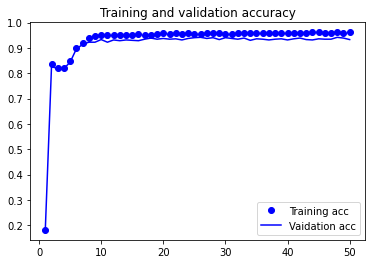

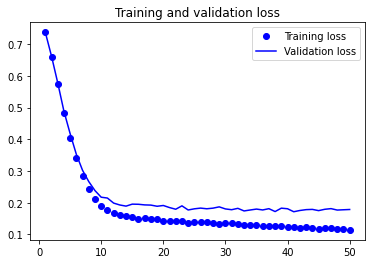

/var/folders/xr/f9q8dphs5vq5mhqy843mnkv40000gn/T/ipykernel_10046/2123936757.py:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = model(torch.tensor(x_test).float())[0] > .5
/var/folders/xr/f9q8dphs5vq5mhqy843mnkv40000gn/T/ipykernel_10046/2123936757.py:113: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = model(torch.tensor(x_test).float())[0] > .5
/var/folders/xr/f9q8dphs5vq5mhqy843mnkv40000gn/T/ipykernel_10046/2123936757.py:113: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = model(torch.tensor(x_test).float())[0] >

f1-score :  0.8797953964194374
precision :  0.9052631578947369
recall :  0.8557213930348259
accuracy :  0.9576703692584809
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2728
           1       0.91      0.86      0.88       603

    accuracy                           0.96      3331
   macro avg       0.94      0.92      0.93      3331
weighted avg       0.96      0.96      0.96      3331

[[2674   54]
 [  87  516]]
final report [{'all_language_evaluate': True, 'train_evaluate_pair': False, 'language_pair': None, 'class': '0', 'precision': 0.97, 'recall': 0.98, 'f1_score': 0.97, 'support': 2728.0}, {'all_language_evaluate': True, 'train_evaluate_pair': False, 'language_pair': None, 'class': '1', 'precision': 0.91, 'recall': 0.86, 'f1_score': 0.88, 'support': 603.0, 'acc': 0.96}]

Evaluating on Assamese-Bengali
f1-score :  0.8896551724137931
precision :  0.9314079422382672
recall :  0.8514851485148515
accuracy :  0.962352941176470

epoch 4200
                    Train set - loss: 0.016, accuracy: 0.991 
                    Val set - loss: 1.191, accuracy: 0.79
epoch 4300
                    Train set - loss: 0.012, accuracy: 0.994 
                    Val set - loss: 1.207, accuracy: 0.793
epoch 4400
                    Train set - loss: 0.011, accuracy: 0.996 
                    Val set - loss: 1.235, accuracy: 0.778
epoch 4500
                    Train set - loss: 0.013, accuracy: 0.994 
                    Val set - loss: 1.248, accuracy: 0.793
epoch 4600
                    Train set - loss: 0.012, accuracy: 0.996 
                    Val set - loss: 1.247, accuracy: 0.793
epoch 4700
                    Train set - loss: 0.014, accuracy: 0.994 
                    Val set - loss: 1.265, accuracy: 0.781
epoch 4800
                    Train set - loss: 0.015, accuracy: 0.992 
                    Val set - loss: 1.267, accuracy: 0.784
epoch 4900
                    Train set - loss: 0.01, accuracy: 0.996 
     

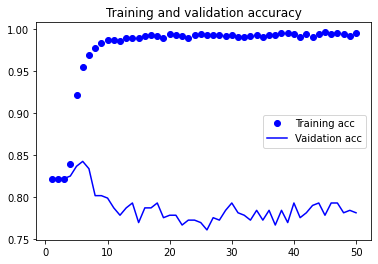

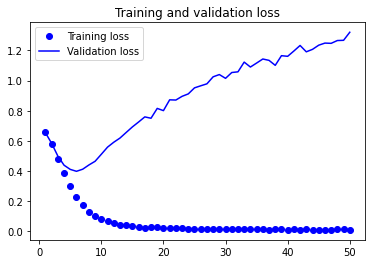

/var/folders/xr/f9q8dphs5vq5mhqy843mnkv40000gn/T/ipykernel_10046/2123936757.py:181: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = model(torch.tensor(x_test).float())[0] > .5


f1-score :  0.8648648648648649
precision :  0.8858131487889274
recall :  0.8448844884488449
accuracy :  0.9529411764705882
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1397
           1       0.89      0.84      0.86       303

    accuracy                           0.95      1700
   macro avg       0.93      0.91      0.92      1700
weighted avg       0.95      0.95      0.95      1700

[[1364   33]
 [  47  256]]
final report [{'all_language_evaluate': False, 'train_evaluate_pair': True, 'language_pair': 'Assamese-Bengali', 'class': '0', 'precision': 0.97, 'recall': 0.98, 'f1_score': 0.97, 'support': 1397.0}, {'all_language_evaluate': False, 'train_evaluate_pair': True, 'language_pair': 'Assamese-Bengali', 'class': '1', 'precision': 0.89, 'recall': 0.84, 'f1_score': 0.86, 'support': 303.0, 'acc': 0.95}]

Training and evaluating on Bengali-Assamese
epoch 0
                    Train set - loss: 0.671, accuracy: 0.807 
          

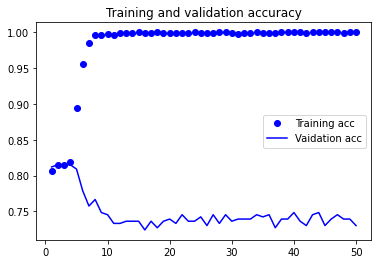

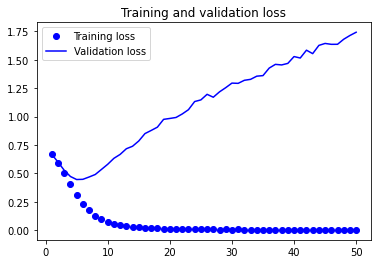

f1-score :  0.8557046979865771
precision :  0.8614864864864865
recall :  0.85
accuracy :  0.947271612507664
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1331
           1       0.86      0.85      0.86       300

    accuracy                           0.95      1631
   macro avg       0.91      0.91      0.91      1631
weighted avg       0.95      0.95      0.95      1631

[[1290   41]
 [  45  255]]
final report [{'all_language_evaluate': False, 'train_evaluate_pair': True, 'language_pair': 'Bengali-Assamese', 'class': '0', 'precision': 0.97, 'recall': 0.97, 'f1_score': 0.97, 'support': 1331.0}, {'all_language_evaluate': False, 'train_evaluate_pair': True, 'language_pair': 'Bengali-Assamese', 'class': '1', 'precision': 0.86, 'recall': 0.85, 'f1_score': 0.86, 'support': 300.0, 'acc': 0.95}]

Exists


/var/folders/xr/f9q8dphs5vq5mhqy843mnkv40000gn/T/ipykernel_10046/2123936757.py:181: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = model(torch.tensor(x_test).float())[0] > .5


In [762]:
print("Evaluating on alldata splits\n")
#nn_evaluate(train_alldata, test_alldata, pairs)


print("Evaluating and Saving final results as csv files on alldata splits\n")
output_alldata,all_lang_fp, all_lang_fn, evaluate_lang_fp, evaluate_lang_fn, train_evaluate_lang_fp, train_evaluate_lang_fn = nn_evaluate(train_alldata, test_alldata, pairs)
prefix = f'../Final_results/all_data/{results_dir}/NN_results'

#prefix = f'../Final_results/all_data/features_wo_dnnlogits_cosims/NN_results'
if os.path.isdir(prefix):
    print("Exists")
else:
    print("Doesn't exist")
    os.mkdir(prefix)
output_alldata.to_csv(f'{prefix}/final_results.csv')
all_lang_fp.to_csv(f'{prefix}/all_lang_falsepos.csv')
all_lang_fn.to_csv(f'{prefix}/all_lang_falseneg.csv')
evaluate_lang_fp.to_csv(f'{prefix}/all_lang_pair_eval_falsepos.csv')
evaluate_lang_fn.to_csv(f'{prefix}/all_lang_pair_eval_falseneg.csv')
train_evaluate_lang_fp.to_csv(f'{prefix}/indiv_pair_eval_falsepos.csv')
train_evaluate_lang_fn.to_csv(f'{prefix}/indiv_pair_eval_falseneg.csv')

# print("Evaluating on realdist splits\n")
# nn_evaluate(train_realdist, test_realdist, pairs)

# print("Evaluating on balanced splits\n")
# nn_evaluate(train_balanced, test_balanced, pairs)

# 5-way NN

In [648]:
pairs = None

with open('language-pairs-cognates.json', 'r') as f:
    pairs = json.loads(f.read())
    print(pairs)
    
train_alldata = {}
test_alldata = {}

train_realdist = {}
test_realdist = {}

train_balanced = {}
test_balanced = {}

for pair in pairs:
    print(pair)
    L1 = pairs[pair]['target']['name']
    L2 = pairs[pair]['source']['name']

    # load datasets
    prefix = f'production_train_test/{L1}-{L2}'

    train_alldata[f'{L1}-{L2}'] = pd.read_csv(f'{prefix}/alldata/{L1}-{L2}-train_production_alldata-5way.csv')
    test_alldata[f'{L1}-{L2}'] = pd.read_csv(f'{prefix}/alldata/{L1}-{L2}-test_production_alldata-5way.csv')
    

# uncomment one of these groups
# features = ['Fast Levenshtein Distance Div Maxlen',
#             'Dolgo Prime Distance Div Maxlen',
#             'Feature Edit Distance Div Maxlen',
#             'Hamming Feature Distance Div Maxlen',
#             'Weighted Feature Distance Div Maxlen',
#             'Partial Hamming Feature Distance Div Maxlen',
#             'plain Levenshtein',
#             'DNN_logits']
# results_dir = '5way-editdists-dnnlogits'

# features = ['Fast Levenshtein Distance Div Maxlen',
#             'Dolgo Prime Distance Div Maxlen',
#             'Feature Edit Distance Div Maxlen',
#             'Hamming Feature Distance Div Maxlen',
#             'Weighted Feature Distance Div Maxlen',
#             'Partial Hamming Feature Distance Div Maxlen',
#             'plain Levenshtein']
# results_dir = '5way-editdists'

# features = ['Fast Levenshtein Distance Div Maxlen',
#             'Dolgo Prime Distance Div Maxlen',
#             'Feature Edit Distance Div Maxlen',
#             'Hamming Feature Distance Div Maxlen',
#             'Weighted Feature Distance Div Maxlen',
#             'Partial Hamming Feature Distance Div Maxlen']
# results_dir = '5way-phonetic-editdists'

features = ['Fast Levenshtein Distance Div Maxlen',
            'Dolgo Prime Distance Div Maxlen',
            'Feature Edit Distance Div Maxlen',
            'Hamming Feature Distance Div Maxlen',
            'Weighted Feature Distance Div Maxlen',
            'Partial Hamming Feature Distance Div Maxlen',
            'DNN_logits',
            'plain Levenshtein',
            'ass_bertmbert',
            'ass_bertxlm',
            'ass_bertindic_bert',
            'ass_bertmuril']
results_dir = '5way-editdists-dnnlogits-mapping'

labels = ['label_bin']

{'Assamese-Bengali': {'target': {'name': 'Assamese', 'epi': 'asm-Beng', 'gtrans': 'as', 'unicode': 'Bengali'}, 'source': {'name': 'Bengali', 'epi': 'ben-Beng', 'gtrans': 'bn', 'unicode': 'Bengali'}, 'wiki': 'https://en.m.wiktionary.org/wiki/Category:Assamese_terms_derived_from_Sanskrit', 'loan-frac': '.5'}, 'Bengali-Assamese': {'target': {'name': 'Bengali', 'epi': 'ben-Beng', 'gtrans': 'bn', 'unicode': 'Bengali'}, 'source': {'name': 'Assamese', 'epi': 'asm-Beng', 'gtrans': 'as', 'unicode': 'Bengali'}, 'wiki': 'https://en.m.wiktionary.org/wiki/Category:Bengali_terms_derived_from_Sanskrit', 'loan-frac': '.5'}}
Assamese-Bengali
Bengali-Assamese


## Definition

In [704]:
class NeuralNetwork(nn.Module):
    def __init__(self, n_features):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(n_features, 256),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, 5)
        )

    def forward(self, x):
        logits_new = self.linear_relu_stack(x)
        logits  = logits_new
        #print(logits,torch.softmax(logits,axis=1))
        
        return torch.softmax(logits,axis=1),\
            logits_new
    
    def fit(self, X_train, Y_train, X_val, Y_val, criterion, optimizer, n_epochs=5000):
        train_losses = []
        val_losses = []
        train_accur = []
        val_accur = []

        for epoch in range(n_epochs):
            y_pred, logits = self(X_train.float())

            train_loss = criterion(y_pred.float(), Y_train.float()).requires_grad_(True)

            if epoch % (n_epochs // 50) == 0:
                train_acc,_ = self.calculate_accuracy(Y_train, y_pred)

                y_val_pred = self(X_val.float())[0]

                val_loss = criterion(y_val_pred.float(), Y_val.float())

                val_acc, total_corr = self.calculate_accuracy(Y_val, y_val_pred)

                print(f'''epoch {epoch}
                    Train set - loss: {self.round_tensor(train_loss)}, accuracy: {self.round_tensor(train_acc)} 
                    Val set - loss: {self.round_tensor(val_loss)}, accuracy: {self.round_tensor(val_acc)}''')
                
                train_losses.append(train_loss.detach().cpu().numpy())
                val_losses.append(val_loss.detach().cpu().numpy())

                val_accur.append(val_acc.detach().cpu().numpy())
                train_accur.append(train_acc.detach().cpu().numpy())

            optimizer.zero_grad()

            train_loss.backward()

            optimizer.step()
            
        return train_losses,val_losses,train_accur,val_accur
    
    def calculate_accuracy(self, y_true, y_pred):
        predicted = torch.argmax(y_pred,axis=1).reshape(-1,1) 
        test = torch.argmax(y_true,axis=1).reshape(-1,1) 
        return ((test == predicted).sum().float() / len(test), (test == predicted).sum())
    
    def round_tensor(self, t, decimal_places=3):
        return round(t.item(), decimal_places)
    
    def plot_losses(self, train_losses, val_losses, train_accur, val_accur):
        epochs = range(1, len(train_accur) + 1)

        plt.plot(epochs, train_accur, 'bo', label='Training acc')
        plt.plot(epochs, val_accur, 'b', label='Vaidation acc')
        plt.title('Training and validation accuracy')
        plt.legend()

        plt.figure()

        plt.plot(epochs, train_losses, 'bo', label='Training loss')
        plt.plot(epochs, val_losses, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()

        plt.show()

In [705]:
def nn_evaluate(full_train_set, full_test_set, pairs_list):   
    all_result_nn = []
    all_result = []
    all_lang_fp_list= []
    all_lang_fn_list=[]
    evaluate_lang_fp_list = []
    evaluate_lang_fn_list = []
    train_evaluate_lang_fp_list = []
    train_evaluate_lang_fn_list = []
     
    pair =None #pair None for all languages evaluation
    display_fields = ['loan_word',
              'original_word',
              'loan_word_epitran',
              'original_word_epitran',
              'loan_english',
              'original_english'] + features
        
    train_set = pd.concat([full_train_set[pair][display_fields + ["label"] + labels] for pair in pairs])
    x_train = train_set[features].values
    x_means = np.mean(x_train, axis=0)
    x_stds = np.std(x_train, axis=0)
    x_stds[x_stds == 0] = 1
    y_train = train_set[labels].values
    
    test_set = pd.concat([full_test_set[pair][display_fields + ["label"] + labels] for pair in pairs])
    x_test = test_set[features].values
    y_test = test_set[labels].values
    
    weight_arr = 1-np.bincount(y_train.reshape(-1,))/len(y_train)
    #weight_arr /= np.sum(weight_arr)
    
    # standardize input features
    x_train = (x_train - x_means)/x_stds
    
    torch.manual_seed(7)
    random.seed(7)
    np.random.seed(7)
    
    model = NeuralNetwork(x_train.shape[1]).to(device)
    print(model)
    
    criterion = nn.CrossEntropyLoss(weight=torch.tensor(weight_arr)).to(device)
    #criterion = nn.CrossEntropyLoss().to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    #optimizer = optim.SGD(model.parameters(),lr=0.00001, momentum=0.0,  weight_decay=0.0, nesterov=False)
    
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1, stratify=y_train)

    x_train = torch.tensor(x_train).to(device)
    x_val = torch.tensor(x_val).to(device)
    y_train = torch.tensor((y_train == np.unique(y_train)).astype(int)).to(device)
    y_val = torch.tensor((y_val == np.unique(y_val)).astype(int)).to(device)
        
    print(x_train)
    print("Training on all langs\n")
    train_losses, val_losses, train_accur, val_accur = \
        model.fit(x_train, y_train, x_val, y_val, criterion, optimizer, n_epochs=10000)
    
    #save the trained model and its state dictionary on your required path 
    model_prefix = '../torch_models/DNN_model/'

    #if os.path.isdir(model_prefix ):
    #    print("Exists")
    #else:
    #    print("Doesn't exist")
    #    os.mkdir(model_prefix )
    #model_path = '../torch_models/DNN_model/DNN_model.bin'
    #torch.save(model,model_path )
    #torch.save(model.state_dict(), model_path)
    model.plot_losses(train_losses,val_losses,train_accur,val_accur)
     
    model.eval()
    
    x_test = (x_test - x_means)/x_stds
    x_test = torch.tensor(x_test).to(device)

    with torch.no_grad():
        y_pred = model(torch.tensor(x_test).float())[0]
        y_pred = np.argmax(y_pred.detach().cpu().numpy(),axis=1)
        print(y_pred,y_test)

        print("f1-score : ", f1_score(y_test, y_pred, average='macro'))
        print("precision : ",precision_score(y_test, y_pred, average='macro'))
        print("recall : ",recall_score(y_test, y_pred, average='macro'))
        print("accuracy : ",accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))
        class_report = classification_report(y_test, y_pred)
        a = classification_report_csv(class_report,pair,all_lang=True, train_evaluate_pair =False)
        all_result_nn.append(a)
        print()
        
        # display false positives and false negatives
        unq = np.array([x + 2*y for x, y in zip(y_pred, y_test)])
        tp = np.array(np.where(unq == 3)).tolist()[0]
        fp = np.array(np.where(unq == 1)).tolist()[0]
        tn = np.array(np.where(unq == 0)).tolist()[0]
        fn = np.array(np.where(unq == 2)).tolist()[0]

        #display(test_set.reset_index(drop=True).iloc[fp,:][display_fields + ["label"]].style.set_caption('False positives'))
        #display(test_set.reset_index(drop=True).iloc[fn,:][display_fields + ["label"]].style.set_caption('False negatives'))
        all_lang_fp = test_set.reset_index(drop=True).iloc[fp,:][display_fields + ["label"]]
        all_lang_fn = test_set.reset_index(drop=True).iloc[fn,:][display_fields + ["label"]]
        
        all_lang_fp.insert(0, 'language_pair', pair)
        all_lang_fn.insert(0, 'language_pair', pair)
        all_lang_fp_list.append(all_lang_fp)
        all_lang_fn_list.append(all_lang_fn)
        for pair in pairs_list:
            print(f'Evaluating on {pair}')

            test_set = full_test_set[pair][display_fields + ["label"] + labels]
            x_test = test_set[features].values
            y_test = test_set[labels].values.ravel()

            x_test = (x_test - x_means)/x_stds
            x_test = torch.tensor(x_test).to(device)
            y_pred = model(torch.tensor(x_test).float())[0] > .5
            y_pred = y_pred.detach().cpu().numpy()
             
            print("f1-score : ", f1_score(y_test, y_pred, average='macro'))
            print("precision : ",precision_score(y_test, y_pred, average='macro'))
            print("recall : ",recall_score(y_test, y_pred, average='macro')) 
            print("accuracy : ",accuracy_score(y_test, y_pred))
            print(classification_report(y_test, y_pred))
            print(confusion_matrix(y_test, y_pred))
            class_report = classification_report(y_test, y_pred)
            a = classification_report_csv(class_report,pair,all_lang=False, train_evaluate_pair =False)
            all_result_nn.append(a)
            print()
            
            # display false positives and false negatives
            unq = np.array([x + 2*y for x, y in zip(y_pred, y_test)])
            tp = np.array(np.where(unq == 3)).tolist()[0]
            fp = np.array(np.where(unq == 1)).tolist()[0]
            tn = np.array(np.where(unq == 0)).tolist()[0]
            fn = np.array(np.where(unq == 2)).tolist()[0]

            #display(test_set.reset_index(drop=True).iloc[fp,:][display_fields + ["label"]].style.set_caption('False positives'))
            #display(test_set.reset_index(drop=True).iloc[fn,:][display_fields + ["label"]].style.set_caption('False negatives'))
            evaluate_lang_fp = test_set.reset_index(drop=True).iloc[fp,:][display_fields + ["label"]]
            evaluate_lang_fn = test_set.reset_index(drop=True).iloc[fn,:][display_fields + ["label"]]
            evaluate_lang_fp.insert(0, 'language_pair', pair)
            evaluate_lang_fn.insert(0, 'language_pair', pair)
            evaluate_lang_fp_list.append(evaluate_lang_fp)
            evaluate_lang_fn_list.append(evaluate_lang_fn)
    for pair in pairs_list:
        print(f'Training and evaluating on {pair}')
        
        train_set = full_train_set[pair][display_fields + ["label"] + labels]
        x_train = train_set[features].values
        x_means = np.mean(x_train, axis=0)
        x_stds = np.std(x_train, axis=0)
        x_stds[x_stds == 0] = 1
        y_train = train_set[labels].values.ravel()
        
        test_set = full_test_set[pair][display_fields + ["label"] + labels]
        x_test = test_set[features].values
        y_test = test_set[labels].values.ravel()
        
        # standardize input features
        x_train = (x_train - x_means)/x_stds
        
        model = NeuralNetwork(x_train.shape[1]).to(device)
    
        criterion = nn.CrossEntropyLoss().to(device)
        optimizer = optim.Adam(model.parameters(), lr=0.00001)

        x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1, stratify=y_train)

        x_train = torch.tensor(x_train).to(device)
        x_val = torch.tensor(x_val).to(device)
        y_train = torch.tensor(y_train).reshape(-1,1).to(device)
        y_val = torch.tensor(y_val).reshape(-1,1).to(device)

        train_losses, val_losses, train_accur, val_accur = \
            model.fit(x_train, y_train, x_val, y_val, criterion, optimizer, n_epochs=5000)
        model.plot_losses(train_losses,val_losses,train_accur,val_accur)

        model.eval()

        x_test = (x_test - x_means)/x_stds
        x_test = torch.tensor(x_test).to(device)
        
        with torch.no_grad():
            y_pred = np.argmax(model(torch.tensor(x_test).float())[0])
            y_pred = y_pred.detach().cpu().numpy()

            print("f1-score : ", f1_score(y_test, y_pred ))
            print("precision : ",precision_score(y_test, y_pred))
            print("recall : ",recall_score(y_test, y_pred )) 
            print("accuracy : ",accuracy_score(y_test, y_pred))
            print(classification_report(y_test, y_pred))
            print(confusion_matrix(y_test, y_pred))
            class_report = classification_report(y_test, y_pred)
            a = classification_report_csv(class_report,pair,all_lang=False,train_evaluate_pair =True)
            all_result_nn.append(a)
            print()
            
            # display false positives and false negatives
            unq = np.array([x + 2*y for x, y in zip(y_pred, y_test)])
            tp = np.array(np.where(unq == 3)).tolist()[0]
            fp = np.array(np.where(unq == 1)).tolist()[0]
            tn = np.array(np.where(unq == 0)).tolist()[0]
            fn = np.array(np.where(unq == 2)).tolist()[0]

            #display(test_set.reset_index(drop=True).iloc[fp,:][display_fields + ["label"]].style.set_caption('False positives'))
            #display(test_set.reset_index(drop=True).iloc[fn,:][display_fields + ["label"]].style.set_caption('False negatives'))
            train_evaluate_lang_fp = test_set.reset_index(drop=True).iloc[fp,:][display_fields + ["label"]]
            train_evaluate_lang_fn = test_set.reset_index(drop=True).iloc[fn,:][display_fields + ["label"]]
            train_evaluate_lang_fp.insert(0, 'language_pair', pair)
            train_evaluate_lang_fn.insert(0, 'language_pair', pair)
            train_evaluate_lang_fp_list.append(train_evaluate_lang_fp)
            train_evaluate_lang_fn_list.append(train_evaluate_lang_fn)
            
    final_result = pd.concat(all_result_nn, ignore_index=True)
    all_lang_fp_list = pd.concat(all_lang_fp_list, ignore_index=True)
    all_lang_fn_list = pd.concat(all_lang_fn_list, ignore_index=True)
    evaluate_lang_fp_list = pd.concat(evaluate_lang_fp_list, ignore_index=True)
    evaluate_lang_fn_list = pd.concat(evaluate_lang_fn_list, ignore_index=True)
    train_evaluate_lang_fp_list = pd.concat(train_evaluate_lang_fp_list, ignore_index=True)
    train_evaluate_lang_fn_list = pd.concat(train_evaluate_lang_fn_list, ignore_index=True)
    
    return final_result, all_lang_fp_list, all_lang_fn_list, evaluate_lang_fp_list, evaluate_lang_fn_list, train_evaluate_lang_fp_list, train_evaluate_lang_fn_list

# NN alldata

In [708]:
train_pruned = {}
train_pruned['Assamese-Bengali'] = pd.concat([
    train_alldata['Assamese-Bengali'].loc[train_alldata['Assamese-Bengali']['label_bin'] == 0][:35],
    train_alldata['Assamese-Bengali'].loc[train_alldata['Assamese-Bengali']['label_bin'] == 1][:35],
    train_alldata['Assamese-Bengali'].loc[train_alldata['Assamese-Bengali']['label_bin'] == 2][:35],
    train_alldata['Assamese-Bengali'].loc[train_alldata['Assamese-Bengali']['label_bin'] == 3][:35],
    train_alldata['Assamese-Bengali'].loc[train_alldata['Assamese-Bengali']['label_bin'] == 4][:35]])
train_pruned['Bengali-Assamese'] = pd.concat([
    train_alldata['Bengali-Assamese'].loc[train_alldata['Bengali-Assamese']['label_bin'] == 0][:35],
    train_alldata['Bengali-Assamese'].loc[train_alldata['Bengali-Assamese']['label_bin'] == 1][:35],
    train_alldata['Bengali-Assamese'].loc[train_alldata['Bengali-Assamese']['label_bin'] == 2][:35],
    train_alldata['Bengali-Assamese'].loc[train_alldata['Bengali-Assamese']['label_bin'] == 3][:35],
    train_alldata['Bengali-Assamese'].loc[train_alldata['Bengali-Assamese']['label_bin'] == 4][:35]])
train_pruned


{'Assamese-Bengali':       Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  \
 3                3             3           3             3             277   
 7                7             7           7             7             331   
 8                8             8           8             8              69   
 25              25            25          25            25              78   
 29              29            29          29            29             125   
 ...            ...           ...         ...           ...             ...   
 1390          1390          1390        1390          1390             336   
 1450          1450          1450        1450          1450             240   
 1455          1455          1455        1455          1455               9   
 1553          1553          1553        1553          1553              39   
 1686          1686          1686        1686          1686              28   
 
       Unnamed: 0.1.1.1 loan_w

Evaluating on alldata splits

Evaluating and Saving final results as csv files on alldata splits

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=12, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=256, out_features=512, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.1, inplace=False)
    (9): Linear(in_features=256, out_features=5, bias=True)
  )
)
tensor([[-1.5897, -0.5832, -1.0387,  ...,  0.3632,  0.5942, -0.0334],
        [ 0.1509, -1.2269, -0.6903,  ...,  0.5891,  0.7785,  0.6081],
        [ 1.3113,  1.6697, -0.1063,  ...,  0.7013, -0.1059,  0.3591],
        ...,
        [ 0.6150,  1.0903,  1.1539,  ..., -0.2673, -2.7175, -0.5079],
        [ 0.4410, -0.2614, -0.7825,  ...,  0.7467,  0.2488,  0.6438],
        [ 0.7311,  0.3179, -0.6165,  ...,  0.3825,  0.6779,  0.5059]],
  

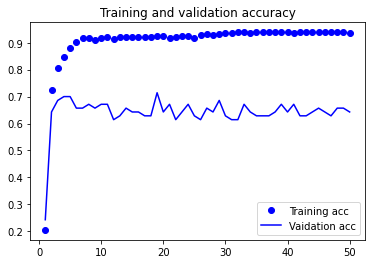

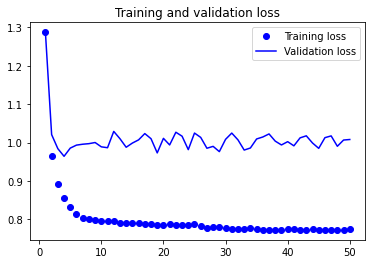

[1 2 0 ... 1 2 1] [[0]
 [2]
 [0]
 ...
 [1]
 [3]
 [0]]
f1-score :  0.6337539428173259
precision :  0.6146382033885814
recall :  0.7079793903526201
accuracy :  0.6970879615731012
              precision    recall  f1-score   support

           0       0.56      0.57      0.56       600
           1       0.50      0.63      0.56       643
           2       0.92      0.78      0.84      1485
           3       0.75      0.67      0.71       535
           4       0.34      0.90      0.50        68

    accuracy                           0.70      3331
   macro avg       0.61      0.71      0.63      3331
weighted avg       0.73      0.70      0.71      3331

[[ 340  228   21   10    1]
 [ 175  402   43   22    1]
 [  81  158 1161   80    5]
 [  15   15   38  358  109]
 [   0    0    2    5   61]]
final report [{'all_language_evaluate': True, 'train_evaluate_pair': False, 'language_pair': None, 'class': '0', 'precision': 0.56, 'recall': 0.57, 'f1_score': 0.56, 'support': 600.0}, {'all_la

/var/folders/xr/f9q8dphs5vq5mhqy843mnkv40000gn/T/ipykernel_10046/1008777866.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = model(torch.tensor(x_test).float())[0]
/var/folders/xr/f9q8dphs5vq5mhqy843mnkv40000gn/T/ipykernel_10046/1008777866.py:119: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = model(torch.tensor(x_test).float())[0] > .5


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [709]:
print("Evaluating on alldata splits\n")
#nn_evaluate(train_alldata, test_alldata, pairs)


print("Evaluating and Saving final results as csv files on alldata splits\n")
output_alldata,all_lang_fp, all_lang_fn, evaluate_lang_fp, evaluate_lang_fn, train_evaluate_lang_fp, train_evaluate_lang_fn = nn_evaluate(train_pruned, test_alldata, pairs)
prefix = f'../Final_results/all_data/{results_dir}/NN_results'

#prefix = f'../Final_results/all_data/features_wo_dnnlogits_cosims/NN_results'
if os.path.isdir(prefix):
    print("Exists")
else:
    print("Doesn't exist")
    os.mkdir(prefix)
output_alldata.to_csv(f'{prefix}/final_results.csv')
all_lang_fp.to_csv(f'{prefix}/all_lang_falsepos.csv')
all_lang_fn.to_csv(f'{prefix}/all_lang_falseneg.csv')
evaluate_lang_fp.to_csv(f'{prefix}/all_lang_pair_eval_falsepos.csv')
evaluate_lang_fn.to_csv(f'{prefix}/all_lang_pair_eval_falseneg.csv')
train_evaluate_lang_fp.to_csv(f'{prefix}/indiv_pair_eval_falsepos.csv')
train_evaluate_lang_fn.to_csv(f'{prefix}/indiv_pair_eval_falseneg.csv')

# print("Evaluating on realdist splits\n")
# nn_evaluate(train_realdist, test_realdist, pairs)

# print("Evaluating on balanced splits\n")
# nn_evaluate(train_balanced, test_balanced, pairs)